In [ ]:
import pandas as pd

df = pd.read_csv('dump.csv')

df.head()

columns_to_drop = ["Unnamed: 0", "companyUrn", "mbrLocationCode", "posLocationCode", "companyUrl"]
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned = df_cleaned.drop_duplicates()

df_cleaned["startDate"] = pd.to_datetime(df_cleaned["startDate"], errors="coerce")
df_cleaned["endDate"] = pd.to_datetime(df_cleaned["endDate"], errors="coerce")

df_cleaned["currently_employed"] = df_cleaned["endDate"].isna()

df_cleaned = df_cleaned.dropna(subset=["posTitle", "companyName", "startDate"])

df_employed = df_cleaned[df_cleaned["currently_employed"] == True]
df_unemployed = df_cleaned[df_cleaned["currently_employed"] == False]

employment_rate = df_cleaned["currently_employed"].mean() * 100

df_cleaned.info()
print(f"Percentage of users currently employed: {employment_rate:.2f}%")

<class 'pandas.core.frame.DataFrame'>
Index: 39519 entries, 0 to 39536
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ageEstimate            39519 non-null  float64       
 1   companyFollowerCount   38056 non-null  float64       
 2   companyHasLogo         36393 non-null  object        
 3   companyName            39519 non-null  object        
 4   companyStaffCount      38385 non-null  float64       
 5   connectionsCount       39519 non-null  float64       
 6   country                39519 non-null  object        
 7   endDate                30625 non-null  datetime64[ns]
 8   followable             39519 non-null  float64       
 9   followersCount         39519 non-null  float64       
 10  genderEstimate         35551 non-null  object        
 11  hasPicture             29592 non-null  object        
 12  isPremium              39519 non-null  float64       
 13  mbrLoc

In [15]:
df_unemployed.describe()

,ageEstimate,companyFollowerCount,companyStaffCount,connectionsCount,endDate,followable,followersCount,isPremium,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
count,30625.000000,2.950200e+04,29756.000000,30625.000000,30625,30625.000000,30625.000000,30625.000000,3.062500e+04,30625,30625.000000,30625.000000
mean,38.528229,2.298894e+05,22558.058173,427.428473,2011-07-20 22:27:41.936326656,0.947298,1165.716343,0.129796,1.239144e+06,2009-04-09 07:34:01.743673344,836.800614,902.240120
min,20.000000,0.000000e+00,0.000000,0.000000,1970-02-01 00:00:00,0.000000,0.000000,0.000000,2.300000e+01,1962-01-01 00:00:00,0.000000,-91.000000
25%,31.000000,1.963000e+03,133.000000,381.000000,2008-09-01 00:00:00,1.000000,362.000000,0.000000,1.697940e+05,2006-01-01 00:00:00,494.250000,747.230800
50%,38.000000,1.742000e+04,1608.000000,500.000000,2012-12-01 00:00:00,1.000000,657.000000,0.000000,2.396910e+05,2010-10-01 00:00:00,714.900000,912.755700
75%,45.000000,1.489340e+05,10735.000000,500.000000,2015-11-01 00:00:00,1.000000,1180.000000,0.000000,2.913060e+05,2014-03-01 00:00:00,1034.250000,1048.358500
max,86.000000,7.502740e+06,568533.000000,500.000000,2019-02-01 00:00:00,1.000000,161922.000000,1.000000,3.845443e+07,2019-02-01 00:00:00,15492.500000,6453.000000
std,9.562060,7.123256e+05,71647.270173,120.414579,NaN,0.223442,2832.582829,0.336084,5.591642e+06,NaN,571.234805,320.237393


In [16]:
df_employed.describe()

,ageEstimate,companyFollowerCount,companyStaffCount,connectionsCount,endDate,followable,followersCount,isPremium,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
count,8894.000000,8.554000e+03,8629.000000,8894.000000,0,8894.000000,8894.000000,8894.000000,8.894000e+03,8894,8673.000000,8044.000000
mean,38.117270,1.602606e+05,13219.378491,415.092309,NaT,0.960198,1334.689454,0.132449,9.015320e+06,2014-12-17 00:23:57.733303296,1010.190338,834.908950
min,20.000000,0.000000e+00,0.000000,0.000000,NaT,0.000000,0.000000,0.000000,2.200000e+01,1973-05-01 00:00:00,0.000000,-91.000000
25%,30.000000,5.090000e+02,33.000000,343.000000,NaT,1.000000,329.000000,0.000000,1.910862e+05,2014-01-01 00:00:00,536.375000,635.375300
50%,37.000000,6.946000e+03,489.000000,500.000000,NaT,1.000000,637.000000,0.000000,2.718265e+05,2016-05-01 00:00:00,817.733300,858.558700
75%,45.000000,8.534800e+04,5797.000000,500.000000,NaT,1.000000,1259.000000,0.000000,2.507117e+07,2017-07-01 00:00:00,1218.333300,992.500000
max,86.000000,7.502740e+06,568533.000000,500.000000,NaT,1.000000,161922.000000,1.000000,3.845442e+07,2019-02-01 00:00:00,10255.000000,9497.000000
std,9.838484,6.254908e+05,50358.593669,132.080548,NaN,0.195505,3423.515015,0.338997,1.445735e+07,NaN,823.713043,364.603051


In [17]:
# Compare average age, followers, gender breakdown, isPremium rate, isFollowable, and skills
comparison_metrics = {
    "Average Age": [df_unemployed["ageEstimate"].mean(), df_employed["ageEstimate"].mean()],
    "Average Followers": [df_unemployed["followersCount"].mean(), df_employed["followersCount"].mean()],
    "Gender Breakdown": [df_unemployed["genderEstimate"].value_counts(normalize=True), df_employed["genderEstimate"].value_counts(normalize=True)],
    "Is Premium Rate": [df_unemployed["isPremium"].mean(), df_employed["isPremium"].mean()],
    "Is Followable Rate": [df_unemployed["followable"].mean(), df_employed["followable"].mean()],
    "Average Skills Count": [df_unemployed["avgMemberPosDuration"].mean(), df_employed["avgMemberPosDuration"].mean()]
}

comparison_df = pd.DataFrame(comparison_metrics, index=["Unemployed", "Employed"])
print(comparison_df)

            Average Age  Average Followers  \
Unemployed    38.528229        1165.716343   
Employed      38.117270        1334.689454   

                                             Gender Breakdown  \
Unemployed  genderEstimate
male      0.674161
female    0....   
Employed    genderEstimate
male      0.656344
female    0....   

            Is Premium Rate  Is Followable Rate  Average Skills Count  
Unemployed         0.129796            0.947298            836.800614  
Employed           0.132449            0.960198           1010.190338  


In [18]:
# Weighted Formula (avgMemberPosDuration = experience) This is an arbitrarily assigned formula to estimate and "grade" a profile
weights = {
    "ageEstimate": 0.1,
    "followersCount": 0.2,
    "isPremium": 0.15,
    "followable": 0.1,
    "avgMemberPosDuration": 0.45
}

def calculate_weighted_score(df):
    return (
        df["ageEstimate"].fillna(0) * weights["ageEstimate"] +
        df["followersCount"].fillna(0) * weights["followersCount"] +
        df["isPremium"].fillna(0) * weights["isPremium"] +
        df["followable"].fillna(0) * weights["followable"] +
        df["avgMemberPosDuration"].fillna(0) * weights["avgMemberPosDuration"]
    )

df_cleaned["weighted_score"] = calculate_weighted_score(df_cleaned)

# average weighted scores
df_weighted_scores = df_cleaned.groupby("currently_employed")["weighted_score"].mean()
print(df_weighted_scores)

currently_employed
False    613.670567
True     714.155516
Name: weighted_score, dtype: float64


DataFrame shape: (39519, 24)

DataFrame columns: ['ageEstimate', 'companyFollowerCount', 'companyHasLogo', 'companyName', 'companyStaffCount', 'connectionsCount', 'country', 'endDate', 'followable', 'followersCount', 'genderEstimate', 'hasPicture', 'isPremium', 'mbrLocation', 'mbrTitle', 'memberUrn', 'posLocation', 'posTitle', 'positionId', 'startDate', 'avgMemberPosDuration', 'avgCompanyPosDuration', 'currently_employed', 'weighted_score']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 39519 entries, 0 to 39536
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ageEstimate            39519 non-null  float64       
 1   companyFollowerCount   38056 non-null  float64       
 2   companyHasLogo         36393 non-null  object        
 3   companyName            39519 non-null  object        
 4   companyStaffCount      38385 non-null  float64       
 5   connectionsCount

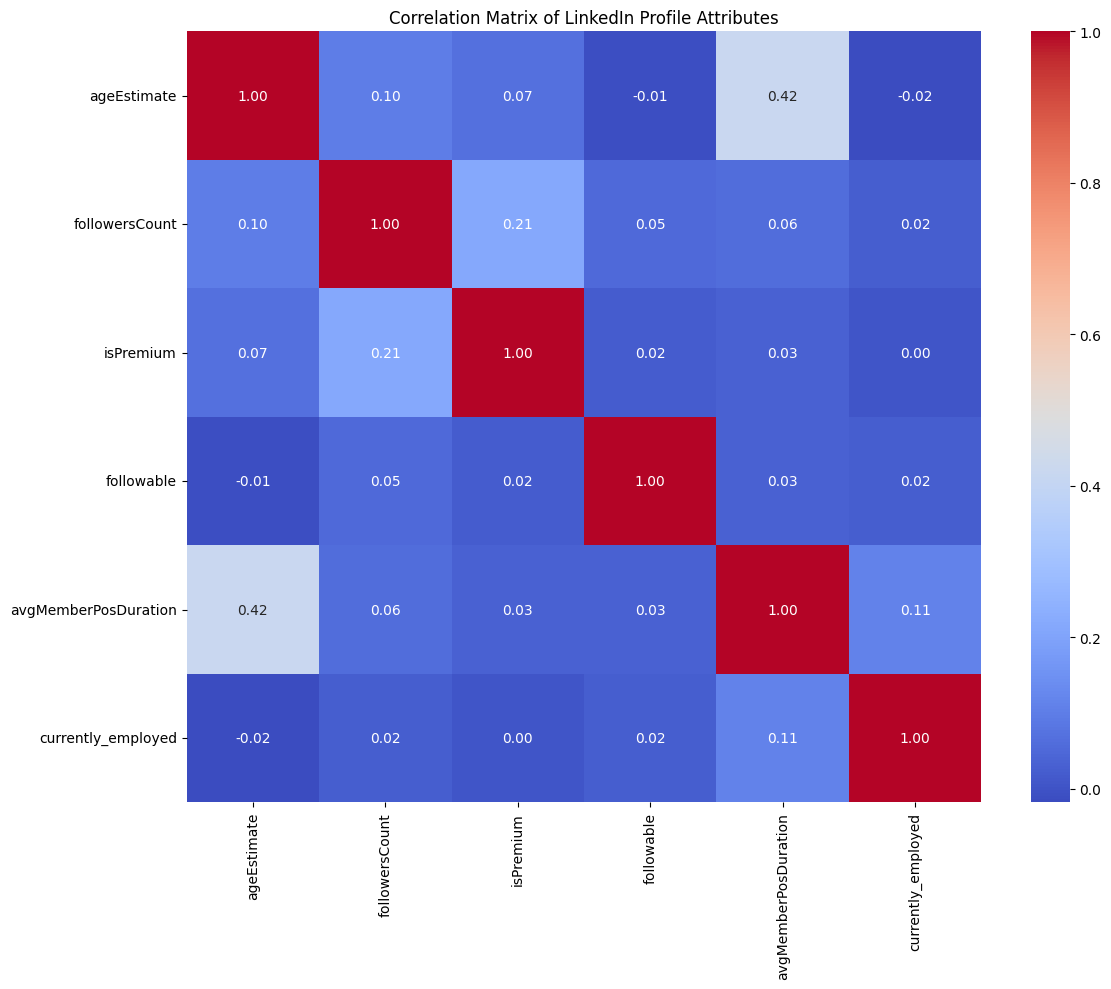

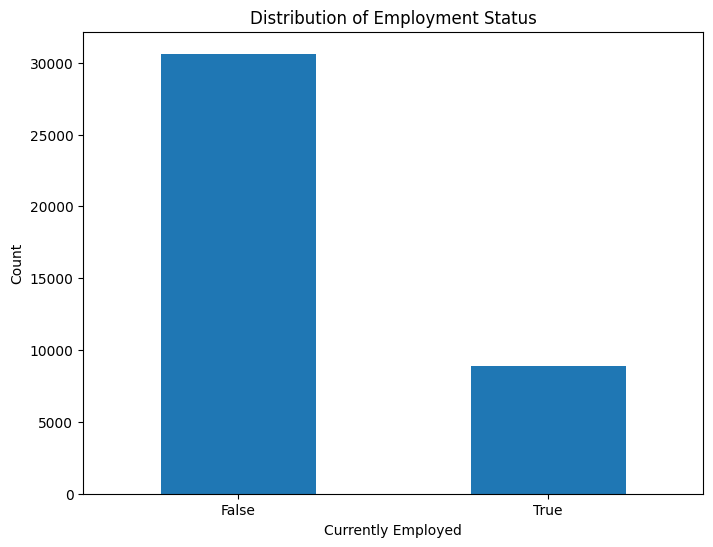


Detailed Regression Results:
                            OLS Regression Results                            
Dep. Variable:     currently_employed   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.60e-155
Time:                        07:39:32   Log-Likelihood:                -20808.
No. Observations:               39298   AIC:                         4.163e+04
Df Residuals:                   39292   BIC:                         4.168e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# LinkedIn Profile Attributes - Regression Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Check basic statistics and structure of the data
print("DataFrame shape:", df_cleaned.shape)
print("\nDataFrame columns:", df_cleaned.columns.tolist())
print("\nDataFrame info:")
df_cleaned.info()
print("\nSummary statistics:")
print(df_cleaned.describe())

# Missing values check
print("\nMissing values per column:")
print(df_cleaned.isnull().sum())

plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned[["ageEstimate", "followersCount", "isPremium", "followable", 
                                 "avgMemberPosDuration", "currently_employed"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of LinkedIn Profile Attributes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
df_cleaned['currently_employed'].value_counts().plot(kind='bar')
plt.title('Distribution of Employment Status')
plt.xlabel('Currently Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

X = df_cleaned[["ageEstimate", "followersCount", "isPremium", "followable", "avgMemberPosDuration"]]
y = df_cleaned["currently_employed"]

# Data cleaning
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy[["ageEstimate", "followersCount", "isPremium", "followable", "avgMemberPosDuration"]]
y = Xy["currently_employed"]

# Now create the statistical model
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print("\nDetailed Regression Results:")
print(model.summary())

# R-squared for individual variables
individual_r2 = {}
for column in X.columns:
    X_single = sm.add_constant(X[[column]])
    model_single = sm.OLS(y, X_single).fit()
    individual_r2[column] = model_single.rsquared

print("\nR-squared for individual variables:")
for var, r2 in individual_r2.items():
    print(f"{var}: {r2:.4f}")

sorted_r2 = sorted(individual_r2.items(), key=lambda x: x[1], reverse=True)
print("\nVariables ranked by R-squared (highest to lowest):")
for var, r2 in sorted_r2:
    print(f"{var}: {r2:.4f}")

lr_model = LinearRegression()
lr_model.fit(X, y)


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("\nFeature coefficients (sorted):")
print(coefficients)


y_pred = lr_model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"\nModel R-squared: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")

df_cleaned['weighted_score'] = calculate_weighted_score(df_cleaned)

weighted_df = df_cleaned[['weighted_score', 'currently_employed']].dropna()
X_weighted = sm.add_constant(weighted_df[['weighted_score']])
y_weighted = weighted_df['currently_employed']

model_weighted = sm.OLS(y_weighted, X_weighted).fit()
print("\\nWeighted Score Approach R-squared:\", model_weighted.rsquared")

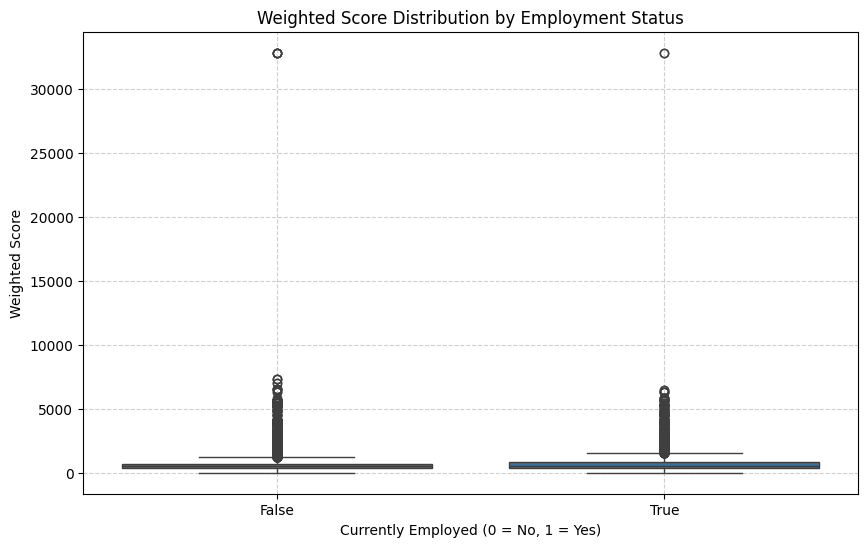


Extended Model (Weighted Score + Gender) Regression Results:
                            OLS Regression Results                            
Dep. Variable:     currently_employed   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     81.62
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           4.21e-36
Time:                        07:39:32   Log-Likelihood:                -21486.
No. Observations:               39519   AIC:                         4.298e+04
Df Residuals:                   39516   BIC:                         4.300e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize weighted score vs employment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='currently_employed', y='weighted_score', data=df_cleaned)
plt.title('Weighted Score Distribution by Employment Status')
plt.xlabel('Currently Employed (0 = No, 1 = Yes)')
plt.ylabel('Weighted Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


df_cleaned['genderEncoded'] = df_cleaned['genderEstimate'].map({'male': 1, 'female': 0})


df_cleaned['genderEncoded'] = df_cleaned['genderEncoded'].fillna(df_cleaned['genderEncoded'].median())

X_extended = df_cleaned[['weighted_score', 'genderEncoded']]
X_extended = sm.add_constant(X_extended)
y_extended = df_cleaned['currently_employed']

model_extended = sm.OLS(y_extended, X_extended).fit()

print("\nExtended Model (Weighted Score + Gender) Regression Results:")
print(model_extended.summary())
